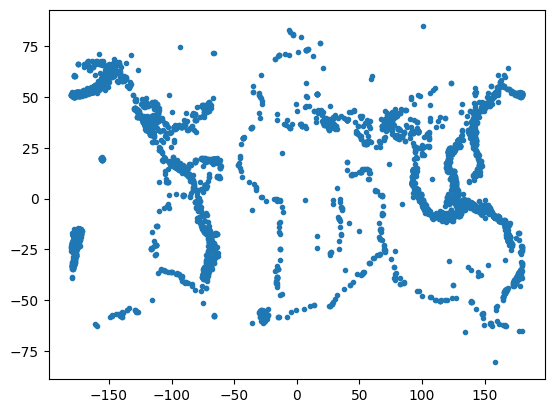

array([[-121.676,   48.203],
       [  99.866,   26.29 ],
       [  83.791,   30.646],
       ...,
       [ 125.024,   22.96 ],
       [-121.767,   37.448],
       [ -97.476,   34.266]])

In [2]:
import numpy as np
import sympy as sy
import numpy.linalg as la
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = np.load('earthquake_coordinates.npy')

plt.plot(data[:,0],data[:,1],".")
plt.show()

data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


For this lab I have provided a k-means implementation for you, as well as some sample code that uses the k-means implementation. You will need to modify this code for your first exercise. This code is adapted from https://github.com/madhug-nadig/Machine-Learning-Algorithms-from-Scratch/blob/master/K%20Means%20Clustering.py

In [ ]:
class K_Means:
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500, normalize = False):
    #k is the number of clusters.  We set two different stopping criteria a tolerence 
    #(if the centers move less than the tolerence the iterations stop)  and a maximum
    # number of iterations
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.normalize = normalize

    def fit(self, data):

        self.centroids = {}

        #initialize the centroids, pick k points arbirarily from the available points
        for i in range(self.k):
            self.centroids[i] = data[np.random.randint(0,data.shape[0]-1)]
        
           
        #begin iterations 
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            #find the distance between the point and cluster; choose the nearest centroid, then add that point to the cluster
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
                if self.normalize == True:
                  self.centroids[classification] = self.centroids[classification]/la.norm(self.centroids[classification])
                  
            isOptimal = True

            #check to see if the centroids have moved less than the tolerence
            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

Here is a worked example using the code above.

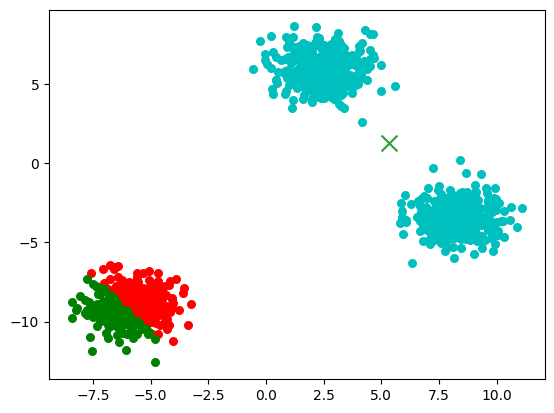

In [ ]:
#example of using k-means class defined above

#create artifical data
X,Y= make_blobs(n_samples=1000, cluster_std=[1.0,1.0,1.0])

#initialize K-means class
km = K_Means(3)
#fit the data (in this case break into 3 clusters)
km.fit(X)

# Plotting starts here
colors = 10*["r", "g", "c", "b", "k"]

# Plot the centroid centers
for centroid in km.centroids:
  plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

# Plot the clusters (color, appropriately)
for classification in km.classes:
  color = colors[classification]
  for features in km.classes[classification]:
    plt.scatter(features[0], features[1], color = color,s = 30)

plt.show()


In [ ]:
def ll2spher(pairs):
  result = []
  for ll in pairs:
 
    r = 1
    Thata = np.deg2rad(ll[0])
    fi = np.pi/180 * (90 - ll[1])

    result.append([r,Thata,fi])
  return np.array(result)

def spher2eucl(pairs):
  result = []
  for spher in pairs:
    x = spher[0]*np.sin(spher[2])*np.cos(spher[1])
    y = spher[0]*np.sin(spher[2])*np.sin(spher[1])
    z = spher[0]*np.cos(spher[2])
    result.append([x,y,z])
  return np.array(result)

def eucl2spher(pairs):
  result = []
  for eucl in pairs:
    r = np.sqrt(eucl[0]**2+eucl[1]**2+eucl[2]**2)
    Thata = np.arctan2(eucl[1],eucl[0])
    fi = np.arccos(eucl[2]/r)
    result.append([r,Thata,fi])
  return np.array(result)

def spher2ll(pairs):
  result = []
  for spher in pairs:
    longitude = spher[1]*180/np.pi
    latitude = 90 - spher[2]*180/np.pi
    result.append([longitude,latitude])
  return np.array(result)


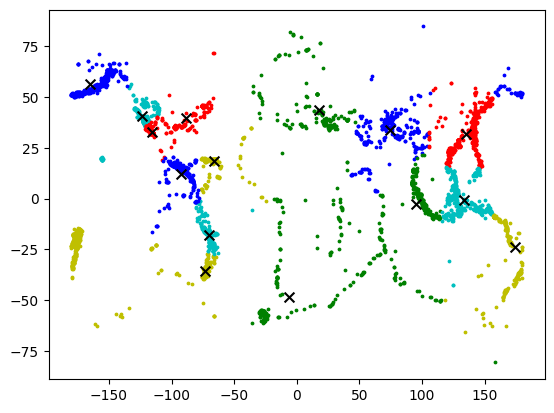

In [ ]:
#Problem 1
#a
a = ll2spher(data)

#b
b = spher2eucl(a)

#c
#initialize K-means class
km = K_Means(15, normalize = True)
#fit the data (in this case break into 15 clusters)
km.fit(spher2eucl(ll2spher(data)))


#d


# Plotting starts here
colors = 10*["r", "g", "c", "b", "y"]


# Plot the clusters (color, appropriately)
for classification in km.classes:
  color = colors[classification]
  for features in km.classes[classification][:500]:
    x,y,z = features
    llis = spher2ll(eucl2spher(np.array([[x,y,z]])))
    plt.scatter(llis[0,0], llis[0,1], color = color, s = 3)

# Plot the centroid centers

for centroid in km.centroids:
  x,y,z = km.centroids[centroid]
  llis = spher2ll(eucl2spher(np.array([[x,y,z]])))
  plt.scatter(llis[0,0], llis[0,1], s = 50, marker = "x", color = "k")

plt.show()


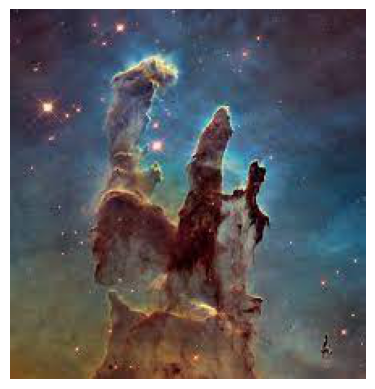

In [26]:
#Problem 2
img = plt.imread("/content/download.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

In [27]:
print(type(img))
print(img.shape)
print(img.size)

<class 'numpy.ndarray'>
(229, 220, 3)
151140


In [28]:
w,h,d = img.shape
image_array = img.reshape(w*h,d)

#Normalize in the range of (0,1)
image_array = image_array/255

In [29]:
from sklearn.utils import shuffle

#fitting model on a small sub sample of the complete image

image_array_sample = shuffle(image_array, random_state=1)[:1000]

image_array_sample.size

3000

In [31]:
kmeans = KMeans(n_clusters=5,random_state=1)
kmeans.fit(image_array_sample)

labels = kmeans.predict(image_array)
labels

c = kmeans.cluster_centers_ 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
def recreate_image(c,labels,w,h,d):
  image = np.zeros((w,h,d))

  label_idx=0

  for i in range(w):
    for j in range(h):
      image[i][j] = c[labels[label_idx]]
      label_idx += 1
  return(image)

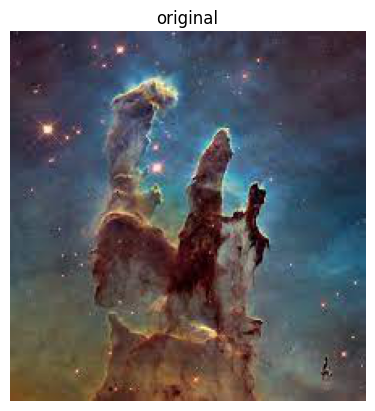

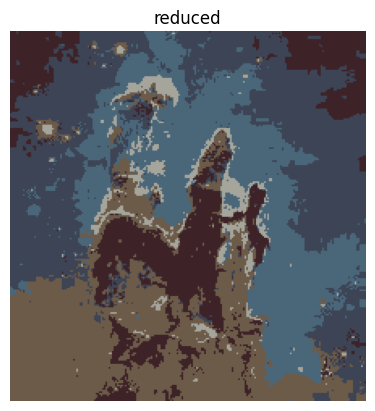

In [35]:
plt.figure(1)
plt.axis('off')
plt.title("original")
plt.imshow(img)
plt.show()

plt.figure(2)
plt.axis('off')
plt.title("reduced")
plt.imshow(recreate_image(c,labels,w,h,d))
plt.show()

In [41]:
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(image_array_sample)

labels = kmeans.predict(image_array)
labels

c = kmeans.cluster_centers_ 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


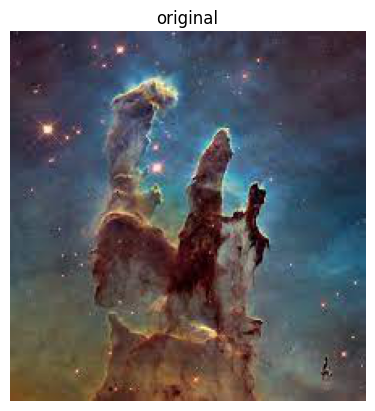

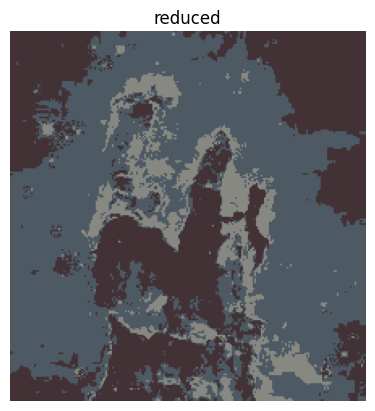

In [42]:
plt.figure(1)
plt.axis('off')
plt.title("original")
plt.imshow(img)
plt.show()

plt.figure(2)
plt.axis('off')
plt.title("reduced")
plt.imshow(recreate_image(c,labels,w,h,d))
plt.show()